In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [2]:
AvailabilityDF = pd.read_csv('/content/AvailabilityDF2.csv')
Daily_Market_Price = pd.read_csv('/content/Daily_Market_Price.csv')

In [6]:
AvailabilityDF.dtypes

Date            object
sum            float64
min            float64
max            float64
mean           float64
median         float64
std            float64
fluctuation    float64
year             int64
dtype: object

In [5]:
Daily_Market_Price.dtypes

Date            object
min            float64
max            float64
mean           float64
median         float64
std            float64
fluctuation    float64
dtype: object

In [8]:
Daily_Market_Price["Date"] = pd.to_datetime(Daily_Market_Price["Date"])
AvailabilityDF["Date"] = pd.to_datetime(AvailabilityDF["Date"])

In [9]:
AvailabilityDF

,Date,sum,min,max,mean,median,std,fluctuation,year
0,2000-01-01,2.679578e+08,0.0,1240000.0,180079.181788,63000.000,261421.014697,1240000.0,2000
1,2000-01-02,2.656771e+08,0.0,1240000.0,178546.469758,63000.000,262017.008353,1240000.0,2000
2,2000-01-03,2.656350e+08,0.0,1240000.0,178518.156384,63000.000,261684.301453,1240000.0,2000
3,2000-01-04,2.651891e+08,0.0,1240000.0,178218.482527,63000.000,261226.289468,1240000.0,2000
4,2000-01-05,2.652653e+08,0.0,1240000.0,178269.710349,63000.000,262154.573430,1240000.0,2000
...,...,...,...,...,...,...,...,...,...
7300,2019-12-27,3.459343e+08,0.0,1240000.0,63497.487968,3505.485,171236.716548,1240000.0,2019
7301,2019-12-28,3.570363e+08,0.0,1240000.0,65535.288565,4935.610,172537.255887,1240000.0,2019
7302,2019-12-29,3.535170e+08,0.0,1240000.0,64889.317878,4927.395,171882.778907,1240000.0,2019
7303,2019-12-30,3.440779e+08,0.0,1240000.0,63156.740677,4157.110,164346.920508,1240000.0,2019


In [4]:
Daily_Market_Price

,Date,min,max,mean,median,std,fluctuation
0,1995-07-20,1.073,2.827,1.409435,1.073,0.627518,1.754
1,1995-07-21,1.000,16.670,4.924333,5.000,4.337455,15.670
2,1995-07-22,1.000,2.500,1.269500,1.188,0.401461,1.500
3,1995-07-23,0.100,1.238,0.953083,1.000,0.344377,1.138
4,1995-07-24,0.990,22.500,4.305917,2.500,5.671871,21.510
...,...,...,...,...,...,...,...
9486,2021-07-09,83.430,98.040,90.571250,84.940,7.034694,14.610
9487,2021-07-10,83.150,97.760,85.156250,84.000,3.785181,14.610
9488,2021-07-11,83.100,83.920,83.352917,83.100,0.373462,0.820
9489,2021-07-12,84.430,85.340,84.980000,85.290,0.418642,0.910


In [13]:
Daily_Market_Price.columns

Index(['Date', 'min', 'max', 'mean', 'median', 'std', 'fluctuation'], dtype='object')

In [14]:
DMC = ['Date','min_Price', 'max_Price', 'mean_Price', 'median_Price', 'std_Price', 'fluctuation_Price']
Daily_Market_Price.columns = DMC

In [15]:
AvailabilityDF.columns

Index(['Date', 'sum', 'min', 'max', 'mean', 'median', 'std', 'fluctuation',
       'year'],
      dtype='object')

In [18]:
Av = ['Date','sum_Av', 'min_Av', 'max_Av', 'mean_Av', 'median_Av', 'std_Av', 'fluctuation_Av', 'year']
AvailabilityDF.columns = Av

In [19]:
df = AvailabilityDF.merge(Daily_Market_Price, how = 'inner', on = 'Date')
df

,Date,sum_Av,min_Av,max_Av,mean_Av,median_Av,std_Av,fluctuation_Av,year,min_Price,max_Price,mean_Price,median_Price,std_Price,fluctuation_Price
0,2000-01-01,2.679578e+08,0.0,1240000.0,180079.181788,63000.000,261421.014697,1240000.0,2000,32.284788,46.284788,32.868121,32.284788,2.857738,14.000
1,2000-01-02,2.656771e+08,0.0,1240000.0,178546.469758,63000.000,262017.008353,1240000.0,2000,32.284788,50.284788,33.034788,32.284788,3.674235,18.000
2,2000-01-03,2.656350e+08,0.0,1240000.0,178518.156384,63000.000,261684.301453,1240000.0,2000,32.284788,50.284788,37.272288,32.284788,7.710767,18.000
3,2000-01-04,2.651891e+08,0.0,1240000.0,178218.482527,63000.000,261226.289468,1240000.0,2000,32.284788,50.284788,41.688955,41.284788,8.150672,18.000
4,2000-01-05,2.652653e+08,0.0,1240000.0,178269.710349,63000.000,262154.573430,1240000.0,2000,32.284788,51.284788,40.893121,41.284788,7.956234,19.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7300,2019-12-27,3.459343e+08,0.0,1240000.0,63497.487968,3505.485,171236.716548,1240000.0,2019,249.839113,470.839113,331.918405,351.789113,69.608633,221.000
7301,2019-12-28,3.570363e+08,0.0,1240000.0,65535.288565,4935.610,172537.255887,1240000.0,2019,229.512930,315.012930,279.387930,315.012930,43.058668,85.500
7302,2019-12-29,3.535170e+08,0.0,1240000.0,64889.317878,4927.395,171882.778907,1240000.0,2019,199.389260,476.389260,246.472593,249.389260,53.701200,277.000
7303,2019-12-30,3.440779e+08,0.0,1240000.0,63156.740677,4157.110,164346.920508,1240000.0,2019,249.392898,476.392898,323.892898,299.642898,88.799114,227.000


In [32]:
df['month'] = AvailabilityDF.set_index('Date').index.month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


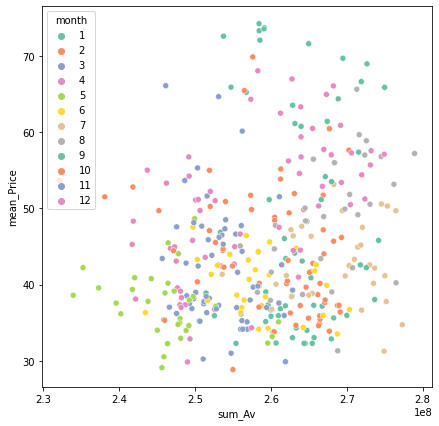

In [78]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2000], df['mean_Price'][df['year'] == 2000], hue =df['month'][df['year'] == 2000], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


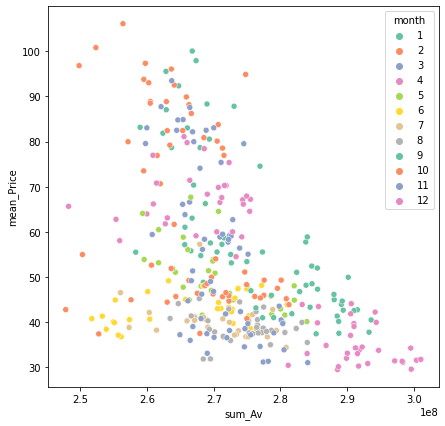

In [79]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2001], df['mean_Price'][df['year'] == 2001], hue =df['month'][df['year'] == 2001], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


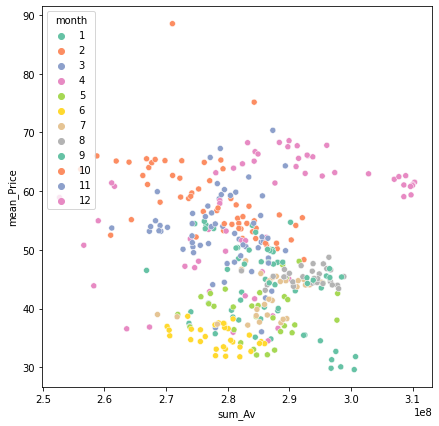

In [80]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2002], df['mean_Price'][df['year'] == 2002], hue =df['month'][df['year'] == 2002], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


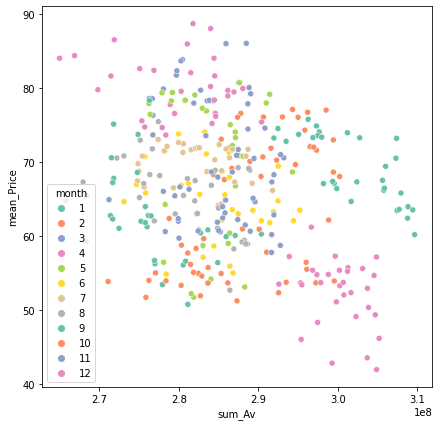

In [81]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2003], df['mean_Price'][df['year'] == 2003], hue =df['month'][df['year'] == 2003], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


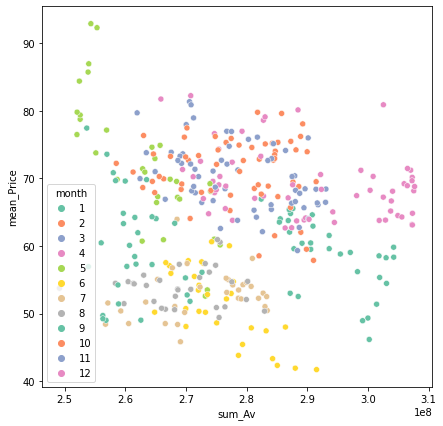

In [82]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2004], df['mean_Price'][df['year'] == 2004], hue =df['month'][df['year'] == 2004], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


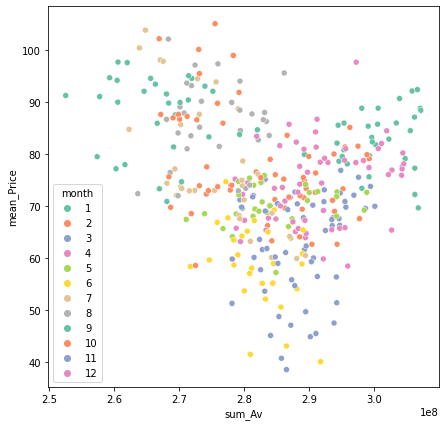

In [83]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2005], df['mean_Price'][df['year'] == 2005], hue =df['month'][df['year'] == 2005], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


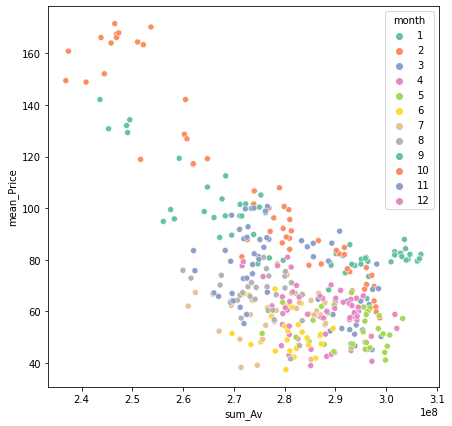

In [84]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2006], df['mean_Price'][df['year'] == 2006], hue =df['month'][df['year'] == 2006], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


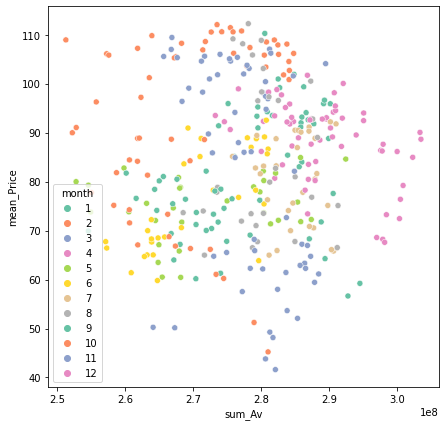

In [85]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2007], df['mean_Price'][df['year'] == 2007], hue =df['month'][df['year'] == 2007], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


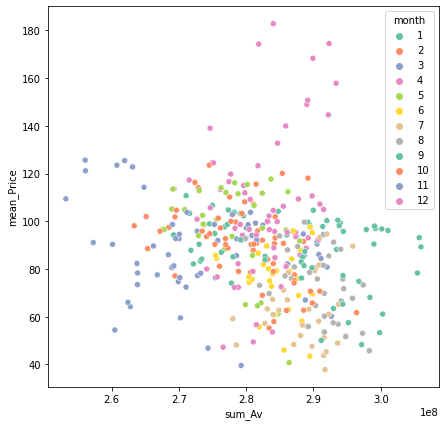

In [86]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2008], df['mean_Price'][df['year'] == 2008], hue =df['month'][df['year'] == 2008], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


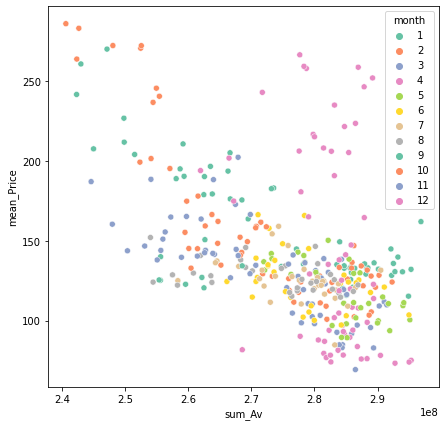

In [87]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2009], df['mean_Price'][df['year'] == 2009], hue =df['month'][df['year'] == 2009], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


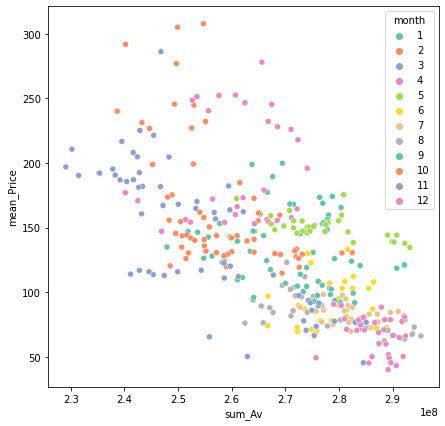

In [77]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2010], df['mean_Price'][df['year'] == 2010], hue =df['month'][df['year'] == 2010], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


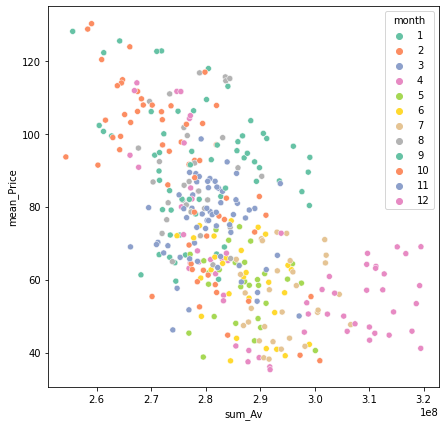

In [88]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2011], df['mean_Price'][df['year'] == 2011], hue =df['month'][df['year'] == 2011], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


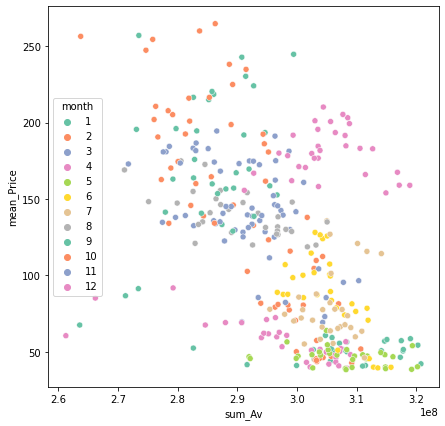

In [90]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2012], df['mean_Price'][df['year'] == 2012], hue =df['month'][df['year'] == 2012], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


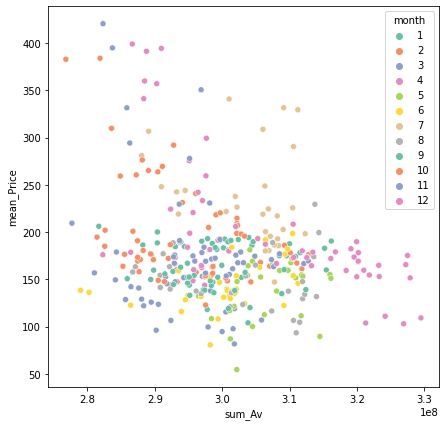

In [91]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2013], df['mean_Price'][df['year'] == 2013], hue =df['month'][df['year'] == 2013], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


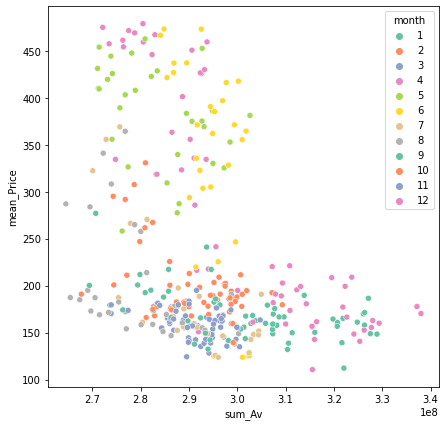

In [92]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2014], df['mean_Price'][df['year'] == 2014], hue =df['month'][df['year'] == 2014], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


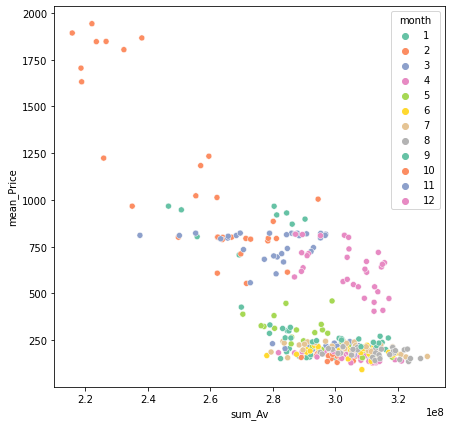

In [93]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2015], df['mean_Price'][df['year'] == 2015], hue =df['month'][df['year'] == 2015], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


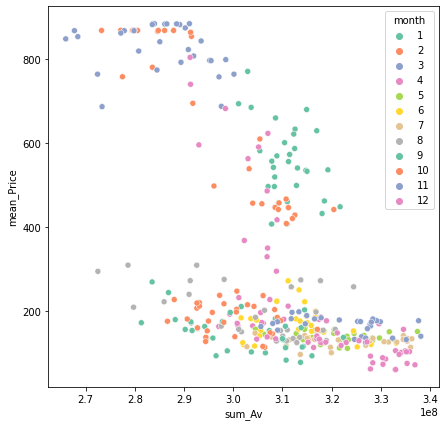

In [94]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2016], df['mean_Price'][df['year'] == 2016], hue =df['month'][df['year'] == 2016], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


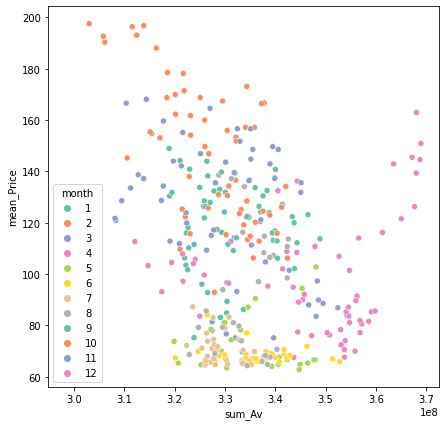

In [95]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2017], df['mean_Price'][df['year'] == 2017], hue =df['month'][df['year'] == 2017], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


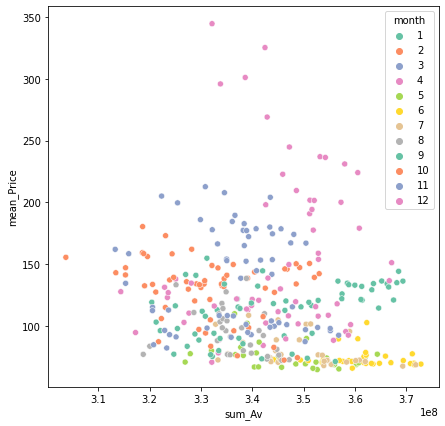

In [96]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2018], df['mean_Price'][df['year'] == 2018], hue =df['month'][df['year'] == 2018], palette = 'Set2' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


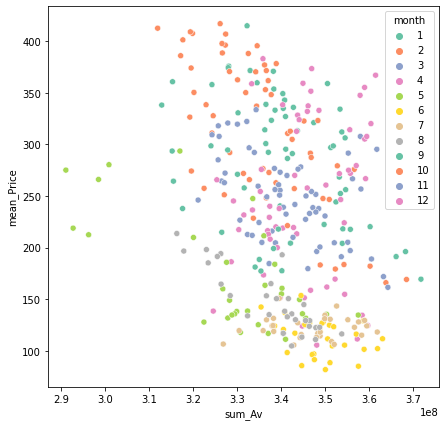

In [97]:
fig, ax = pyplot.subplots(figsize=(7,7))
sns.scatterplot(df['sum_Av'][df['year'] == 2019], df['mean_Price'][df['year'] == 2019], hue =df['month'][df['year'] == 2019], palette = 'Set2' )